<a href="https://colab.research.google.com/github/TanChen168/Week7_ClassificationModels/blob/main/ClassificationMetricsExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns

#import some necessary tools
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

#Importing the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

df = pd.read_csv('/content/sample_data/cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
#Prepare the data for modeling and validation

#Train-test split.  Set the random state to 42


# Convert target to numerical values
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

# Create test-train-split
y = df['diagnosis']
X = df.drop(columns = 'diagnosis')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
#Create a pipeline with a StandardScaler and a KNeighborsClassifier
#Create another pipeline with StandardScaler and DummyClassifier
#using the 'most_frequent' strategy

#Fit both model pipelines and save their predictions test sets

scaler = StandardScaler() 
KNClassifier = KNeighborsClassifier()
KNClassifier_pipe = make_pipeline(scaler, KNClassifier)
KNClassifier_pipe.fit(X_train, y_train)
KNpredictions = KNClassifier.predict(X_test)
score = KNClassifier.score(X_test, y_test)
print(score)


0.6293706293706294


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [5]:
scaler = StandardScaler() 
DClassifier = DummyClassifier(strategy='most_frequent')
DClassifier_pipe = make_pipeline(scaler, DClassifier, )
DClassifier_pipe.fit(X_train, y_train)
Dpredictions = DClassifier.predict(X_test)
score = DClassifier.score(X_test, y_test)
print(score)

0.6223776223776224


tp:  1
tn:  89
fp:  0
fn:  53
Accuracy:  0.6293706293706294
Recall:  0.018518518518518517
Precision Score:  1.0
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        89
           1       1.00      0.02      0.04        54

    accuracy                           0.63       143
   macro avg       0.81      0.51      0.40       143
weighted avg       0.77      0.63      0.49       143



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


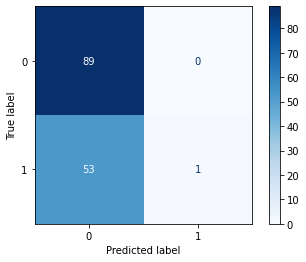

In [6]:
# Accuracy of using KNClassifier
cm = confusion_matrix(y_test.values, KNpredictions)
cm.ravel()
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y_test, KNpredictions)
recall = recall_score(y_test, KNpredictions)
precisionscore = precision_score(y_test, KNpredictions)
print('tp: ', tp)
print('tn: ', tn)
print('fp: ', fp)
print('fn: ', fn)
print('Accuracy: ',  accuracy)
print('Recall: ', recall)
print('Precision Score: ', precisionscore)

Creport = classification_report(y_test, KNpredictions)
print(Creport)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNClassifier, X_test, y_test, cmap = 'Blues');



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

tp:  0
tn:  89
fp:  0
fn:  54
Accuracy:  0.6223776223776224
Recall:  0.0
Precision Score:  0.0
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        89
           1       0.00      0.00      0.00        54

    accuracy                           0.62       143
   macro avg       0.31      0.50      0.38       143
weighted avg       0.39      0.62      0.48       143



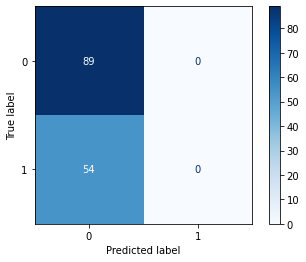

In [7]:
# Accuracy of using DummyClassifier
cm = confusion_matrix(y_test.values, Dpredictions)
cm.ravel()
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y_test, Dpredictions)
recall = recall_score(y_test, Dpredictions)
precisionscore = precision_score(y_test, Dpredictions)
print('tp: ', tp)
print('tn: ', tn)
print('fp: ', fp)
print('fn: ', fn)
print('Accuracy: ',  accuracy)
print('Recall: ', recall)
print('Precision Score: ', precisionscore)

Dreport = classification_report(y_test, Dpredictions)
print(Dreport)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DClassifier, X_test, y_test, cmap = 'Blues');